# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define units to get the temperature in Celsius
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

            # Note: I used pprint to review the response
            # pprint(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | bowen
Processing Record 8 of Set 1 | colonia
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | st. john's
Processing Record 11 of Set 1 | mount gambier
Processing Record 12 of Set 1 | olyokminsk
Processing Record 13 of Set 1 | hadibu
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | nova sintra
Processing Record 17 of Set 1 | walvis bay
Processing Record 18 of Set 1 | el calafate
Processing Record 19 of Set 1 | nea alikarnassos
Processing Record 20 of Set 1 | tazovsky
Processing Record 21 of Set 1 | luderitz
Processing Record 22 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,27.73,77,40,2.43,MV,1702331729
1,port mathurin,-19.6833,63.4167,25.94,76,91,2.67,MU,1702331734
2,albany,42.6001,-73.9662,2.51,75,12,5.36,US,1702331727
3,talnakh,69.4865,88.3972,-26.54,98,100,4.70,RU,1702331558
4,edinburgh of the seven seas,-37.0676,-12.3116,13.53,90,100,9.22,SH,1702331720


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,27.73,77,40,2.43,MV,1702331729
1,port mathurin,-19.6833,63.4167,25.94,76,91,2.67,MU,1702331734
2,albany,42.6001,-73.9662,2.51,75,12,5.36,US,1702331727
3,talnakh,69.4865,88.3972,-26.54,98,100,4.70,RU,1702331558
4,edinburgh of the seven seas,-37.0676,-12.3116,13.53,90,100,9.22,SH,1702331720


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

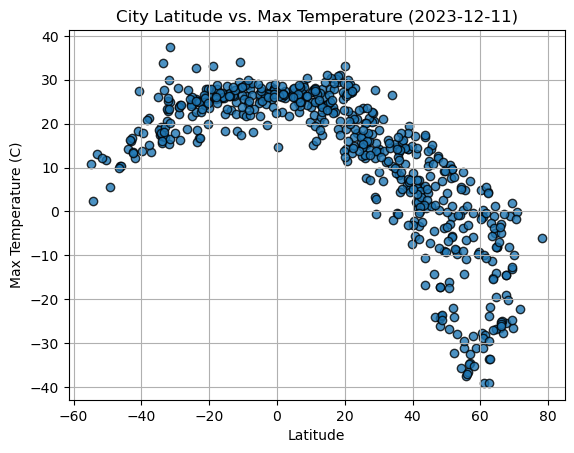

In [8]:
# Build scatter plot for latitude vs. temperature
latitude_values = city_data_df["Lat"]
temperature_values = city_data_df["Max Temp"]
Fig1 = plt.scatter(latitude_values, temperature_values, edgecolors="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

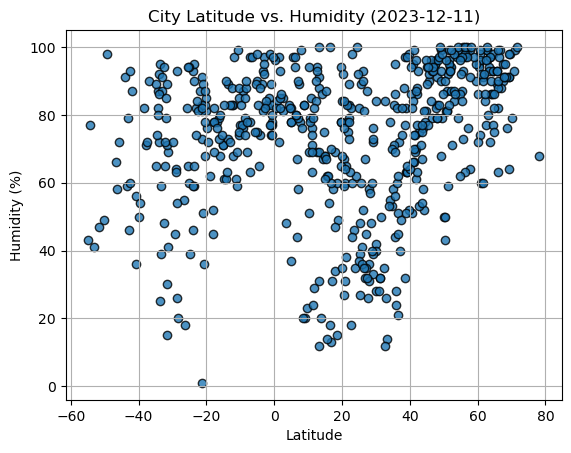

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude_values = city_data_df["Lat"]
humidity_values = city_data_df["Humidity"]
Fig2 = plt.scatter(latitude_values, humidity_values, edgecolors="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

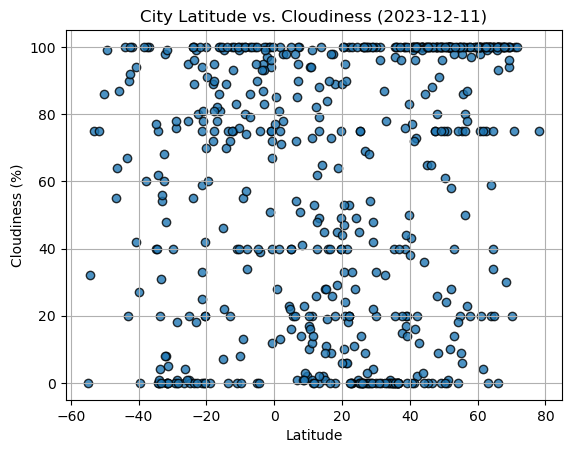

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude_values = city_data_df["Lat"]
cloudiness_values = city_data_df["Cloudiness"]
Fig3 = plt.scatter(latitude_values, cloudiness_values, edgecolors="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

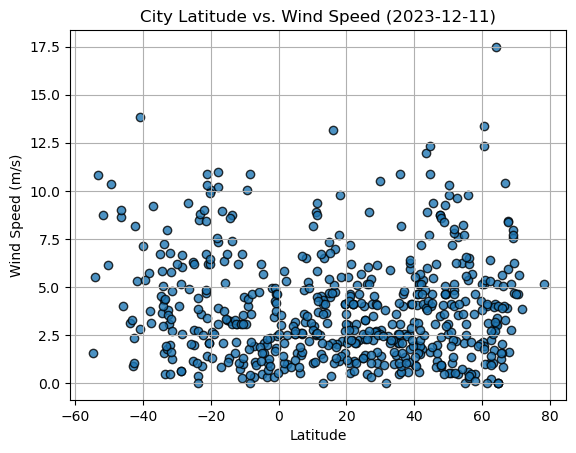

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude_values = city_data_df["Lat"]
wind_values = city_data_df["Wind Speed"]
Fig4 = plt.scatter(latitude_values, wind_values, edgecolors="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def linear_regression_plot(x_values, y_values, title, x_label, y_label, text_coord):

    # Calculate values for linear regression equation
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate y-values for the linear regression line
    regress_values = x_values * slope + intercept

    # Formulate the linear regression equation for display
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot including the linear regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # Add text annotation for line equation
    plt.annotate(line_eq, text_coord, fontsize=15, color='red')

    # Add chart title and labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Print the r-value
    print(f"The r-value is: {r_value}")

    # Show the chart
    plt.show()



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,albany,42.6001,-73.9662,2.51,75,12,5.36,US,1702331727
3,talnakh,69.4865,88.3972,-26.54,98,100,4.70,RU,1702331558
7,colonia,50.9333,6.9500,9.86,81,0,4.12,DE,1702331546
9,st. john's,47.5649,-52.7093,12.66,95,75,8.75,CA,1702331771
11,olyokminsk,60.3736,120.4264,-27.72,95,100,2.11,RU,1702331925


In [14]:
# Show record count for cities in Northern Hemispehere
northern_hemi_df.count()

City          401
Lat           401
Lng           401
Max Temp      401
Humidity      401
Cloudiness    401
Wind Speed    401
Country       401
Date          401
dtype: int64

In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,27.73,77,40,2.43,MV,1702331729
1,port mathurin,-19.6833,63.4167,25.94,76,91,2.67,MU,1702331734
4,edinburgh of the seven seas,-37.0676,-12.3116,13.53,90,100,9.22,SH,1702331720
5,waitangi,-43.9535,-176.5597,14.34,91,100,3.13,NZ,1702331722
6,bowen,-20.0167,148.2333,26.86,81,70,10.06,AU,1702331925


In [16]:
# Show record count for cities in Southern Hemispehere
southern_hemi_df.count()

City          180
Lat           180
Lng           180
Max Temp      180
Humidity      180
Cloudiness    180
Wind Speed    180
Country       175
Date          180
dtype: int64

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.830008500338443


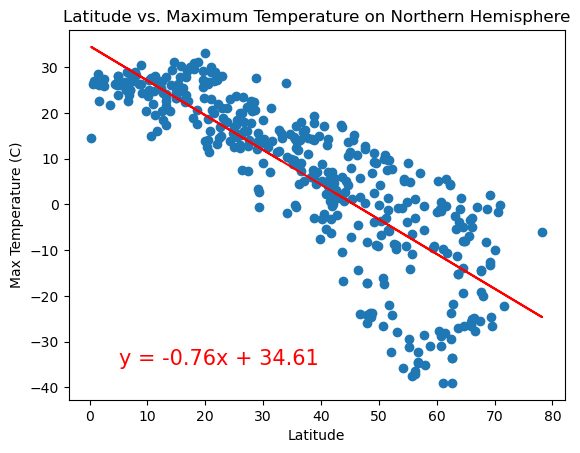

In [17]:
# Linear regression on Northern Hemisphere

# Define x-values and y-values for the plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function to plot the linear regression
Fig5 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Maximum Temperature on Northern Hemisphere",
                              "Latitude",
                              "Max Temperature (C)",
                              (5,-35))

The r-value is: 0.65930529599705


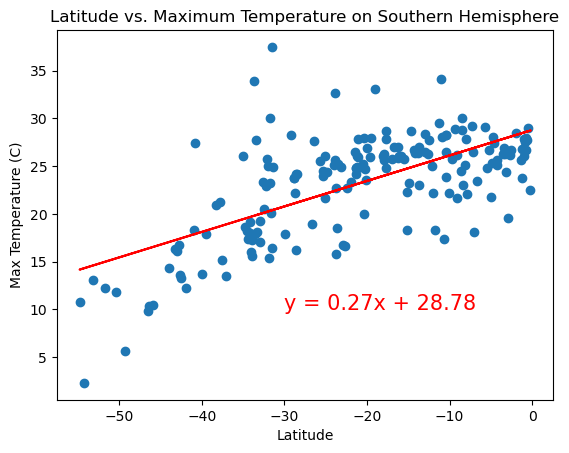

In [18]:
# Linear regression on Southern Hemisphere

# Define x-values and y-values for the plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function to plot the linear regression
Fig6 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Maximum Temperature on Southern Hemisphere",
                              "Latitude",
                              "Max Temperature (C)",
                              (-30,10))

**Discussion about the linear relationship:** 
- The r-value of -0.86481 for linear relationship between Latitude and Maximum Temperature on Northern Hemisphere indicates a strong negative relationship. This supports the belief that as we approach the equator (latitude becomes closer to zero), the maximum temperatures rise for the cities in that area. This relationship is evident in the scatter plot as well.
- The r-value of 0.44969 for linear relationship between Latitude and Maximum Temperature on Southern Hemisphere indicates a weak positive relationship. This indicates that the maximum temperatures of some cities drop as we move away from equator in Southern Hemisphere, however, the decline in temperatures is not very sharp and not true for majority of the data we are using.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3882039343598024


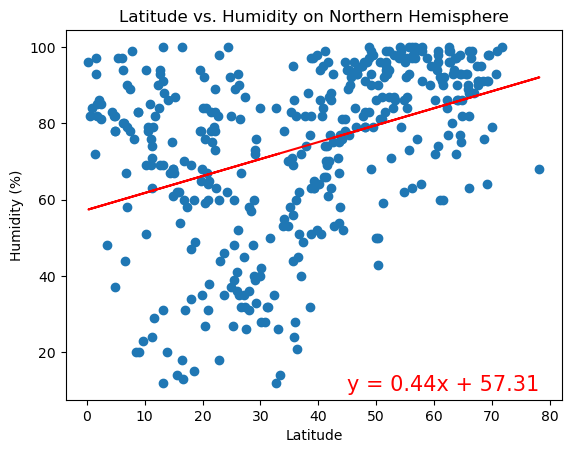

In [19]:
# Northern Hemisphere

# Define x-values and y-values for the plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function to plot the linear regression
Fig7 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Humidity on Northern Hemisphere",
                              "Latitude",
                              "Humidity (%)",
                              (45,10))

The r-value is: 0.3514219525395539


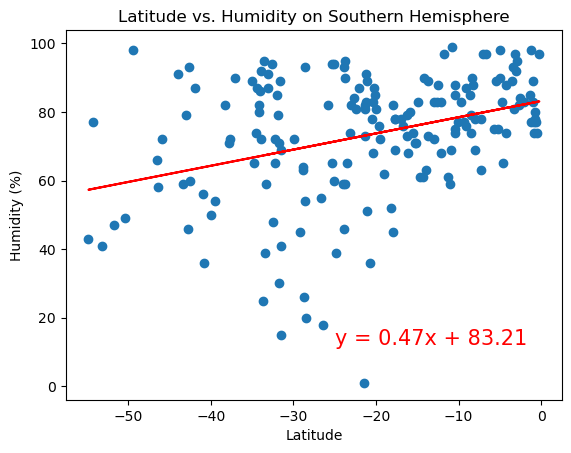

In [20]:
# Southern Hemisphere
# Define x-values and y-values for the plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function to plot the linear regression
Fig8 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Humidity on Southern Hemisphere",
                              "Latitude",
                              "Humidity (%)",
                              (-25,12))

**Discussion about the linear relationship:**
- The r-value of 0.48993 for linear relationship between Latitude and Humidity on Northern Hemisphere indicates a weak to moderate positive relationship. This indicates that the humidity level of a moderate number of cities increases as we move away from equator in Northern Hemisphere, however, this increase in humidity is not very sharp and might not be true for the majority of the data.
- The r-value of 0.24570 for linear relationship between Latitude and Humidity on Southern Hemisphere indicates a very weak positive relationship. This indicates that there is none to very less change in humidity levels as we move away from equator in Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.36185349962817054


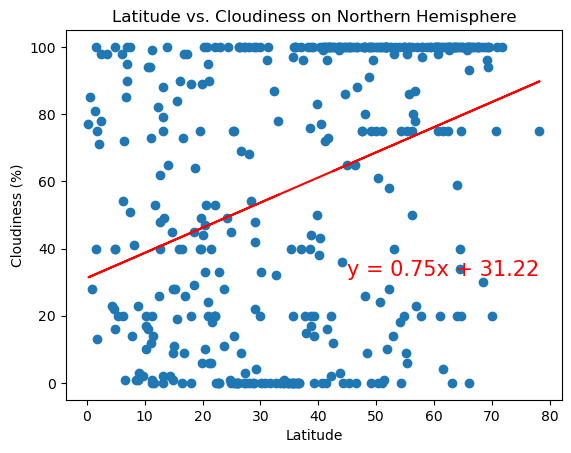

In [21]:
# Northern Hemisphere

# Define x-values and y-values for the plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function to plot the linear regression
Fig9 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Cloudiness on Northern Hemisphere",
                              "Latitude",
                              "Cloudiness (%)",
                              (45,32))

The r-value is: 0.22458052747781027


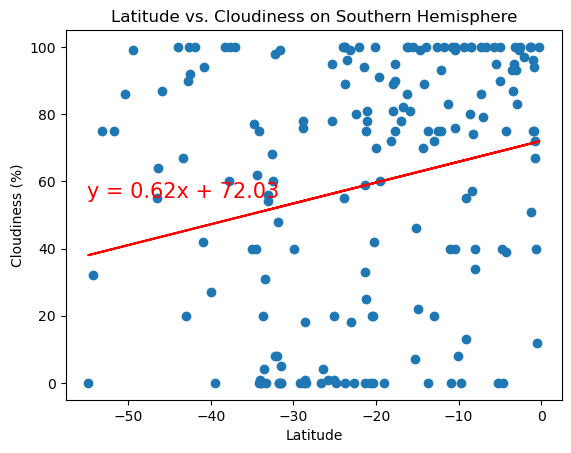

In [22]:
# Southern Hemisphere

# Define x-values and y-values for the plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function to plot the linear regression
Fig10 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Cloudiness on Southern Hemisphere",
                              "Latitude",
                              "Cloudiness (%)",
                              (-55,55))

**Discussion about the linear relationship:**
- The r-value of 0.28001 for linear relationship between Latitude and Cloudiness on Northern Hemisphere indicates a very weak positive relationship. This indicates that the cloudiness in very few cities increases as we move away from equator in Northern Hemisphere, however, this change in cloudiness is not signigicant and might not be true for the majority of the data.
- The r-value of 0.27786 for linear relationship between Latitude and Cloudiness on Southern Hemisphere indicates a very weak positive relationship. This indicates that there is none to very less change in cloudiness levels as we move away from equator in Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11930383891647274


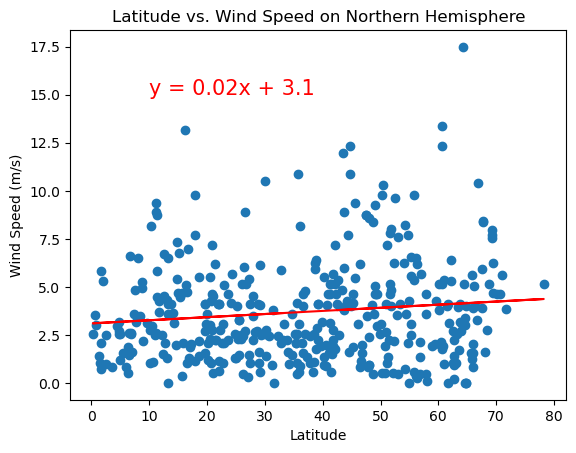

In [23]:
# Northern Hemisphere

# Define x-values and y-values for the plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function to plot the linear regression
Fig11 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Wind Speed on Northern Hemisphere",
                              "Latitude",
                              "Wind Speed (m/s)",
                              (10,15))

The r-value is: -0.2823464032240506


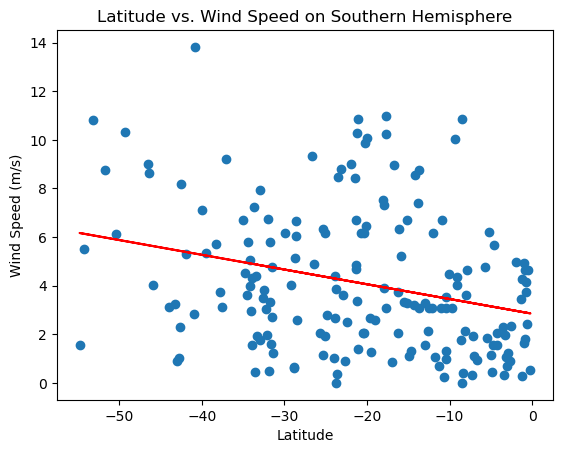

In [24]:
# Southern Hemisphere

# Define x-values and y-values for the plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function to plot the linear regression
Fig12 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Wind Speed on Southern Hemisphere",
                              "Latitude",
                              "Wind Speed (m/s)",
                              (-35,15))

**Discussion about the linear relationship:**
- The r-value of 0.02818 for linear relationship between Latitude and Wind Speed on Northern Hemisphere indicates almost no relationship. This indicates that it will be insignificant to compare wind speeds as we move away from equator in Northern Hemisphere. The chart presents a good representation of this fact.
- The r-value of -0.38972 for linear relationship between Latitude and Wind Speed on Southern Hemisphere indicates a weak negative relationship. This indicates that wind speeds tend to decrease slighly as we move awway from equator in Souther Hemisphere, however, this decrease in wind speeds is not signifcant and not true for majority of the data.